In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

DATA PREPROCESSING

In [51]:
df=pd.read_csv("DATASETS/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [52]:
df.shape

(5110, 12)

In [53]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [55]:
df.describe

<bound method NDFrame.describe of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urba

In [56]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [57]:
df.dropna(inplace=True)

In [58]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [59]:
df.duplicated().sum()

np.int64(0)

In [60]:
df.shape

(4909, 12)

In [61]:
df = df.dropna()

In [62]:
X = df.drop("stroke", axis=1)
y = df["stroke"]

X_encoded = pd.get_dummies(X, drop_first=True)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X_encoded.columns),
                          pd.DataFrame(y_resampled, columns=["stroke"])], axis=1)

df_resampled.to_csv("DATASETS/healthcare-dataset-stroke-data-encoded-balanced.csv", index=False)

DATA VISUALIZATION

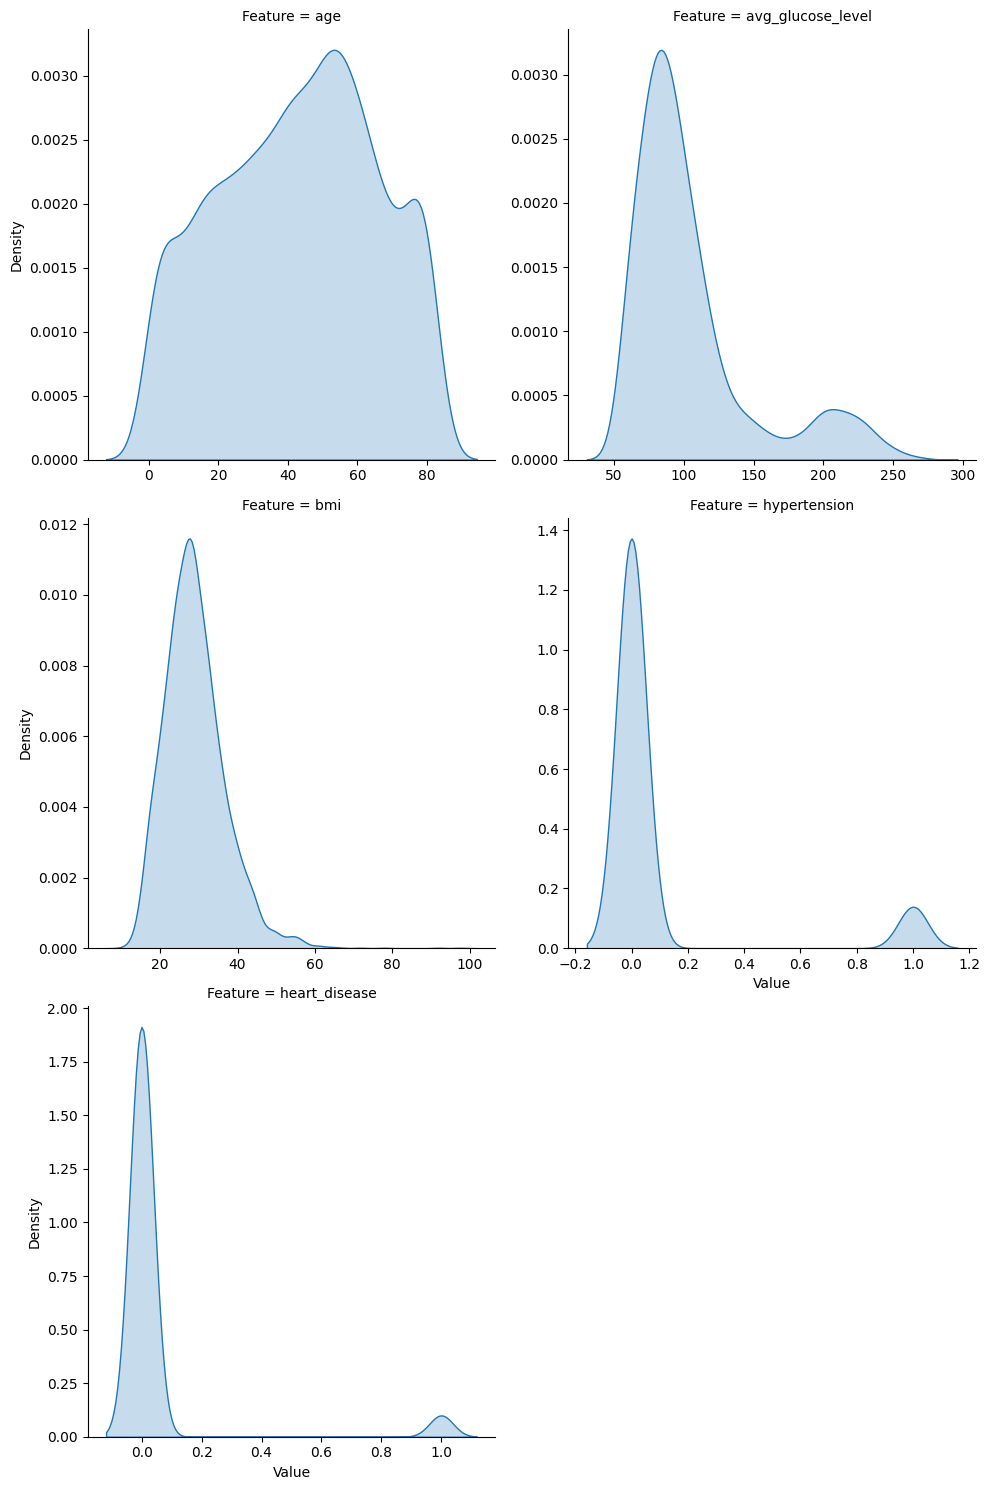

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_resampled= pd.read_csv("DATASETS/healthcare-dataset-stroke-data-encoded-balanced.csv")

cols = ["age", "avg_glucose_level", "bmi", "hypertension", "heart_disease"]

df_long = df[cols].melt(var_name="Feature", value_name="Value")

sns.displot(
    data=df_long,
    x="Value",
    col="Feature",
    kind="kde",
    fill=True,
    col_wrap=2,
    facet_kws={'sharex': False, 'sharey': False}
)

plt.show()


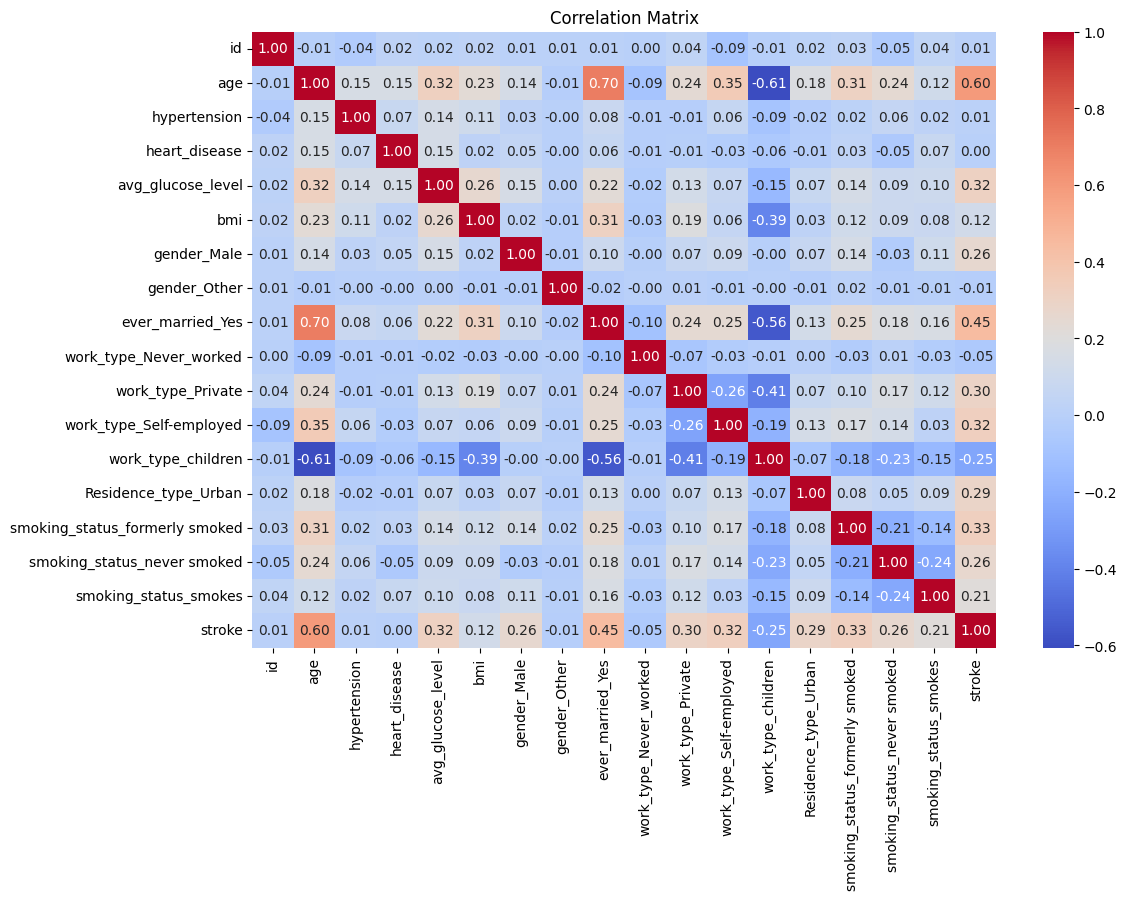

In [64]:
corr = df_resampled.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [65]:
X = df_resampled.drop("stroke", axis=1)
y = df_resampled["stroke"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
dfs = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

dfs.to_csv("DATASETS/healthcare-stroke-scaled.csv", index=False)

In [66]:
df = pd.read_csv("DATASETS/healthcare-dataset-stroke-data-encoded-balanced.csv")

num_df = df.select_dtypes(include="number")

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

filtered_df = num_df[~((num_df < (Q1 - 1.5*IQR)) | (num_df > (Q3 + 1.5*IQR))).any(axis=1)]

filtered_df.to_csv("DATASETS/healthcare-stroke-data-filtered.csv", index=False)

In [67]:
df = pd.read_csv("DATASETS/healthcare-stroke-data-filtered.csv")

df = df.replace({True: 1, False: 0})

df = df.astype(int)

df.to_csv("DATASETS/final_data.csv", index=False)

ALGORITHMS:

In [68]:
df = pd.read_csv("DATASETS/final_data.csv")
X, y = df.drop("stroke", axis=1), df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)


Logistic Regression
Accuracy: 0.8219
Precision: 0.7988
Recall: 0.8580
F1: 0.8274
ROC-AUC: 0.8827

Decision Tree
Accuracy: 0.9025
Precision: 0.8810
Recall: 0.9296
F1: 0.9046
ROC-AUC: 0.9026

Random Forest
Accuracy: 0.9113
Precision: 0.8691
Recall: 0.9673
F1: 0.9156
ROC-AUC: 0.9724

K-Nearest Neighbors
Accuracy: 0.8756
Precision: 0.8193
Recall: 0.9623
F1: 0.8850
ROC-AUC: 0.9302

Support Vector Machine
Accuracy: 0.8456
Precision: 0.7993
Recall: 0.9209
F1: 0.8558
ROC-AUC: 0.9094

Naive Bayes
Accuracy: 0.8231
Precision: 0.7866
Recall: 0.8844
F1: 0.8326
ROC-AUC: 0.8877

AdaBoost
Accuracy: 0.8237
Precision: 0.7830
Recall: 0.8932
F1: 0.8345
ROC-AUC: 0.8917

Gradient Boosting
Accuracy: 0.8719
Precision: 0.8309
Recall: 0.9322
F1: 0.8786
ROC-AUC: 0.9343

XGBoost
Accuracy: 0.9300
Precision: 0.8986
Recall: 0.9686
F1: 0.9323
ROC-AUC: 0.9702

✅ Best Model (Accuracy): XGBoost


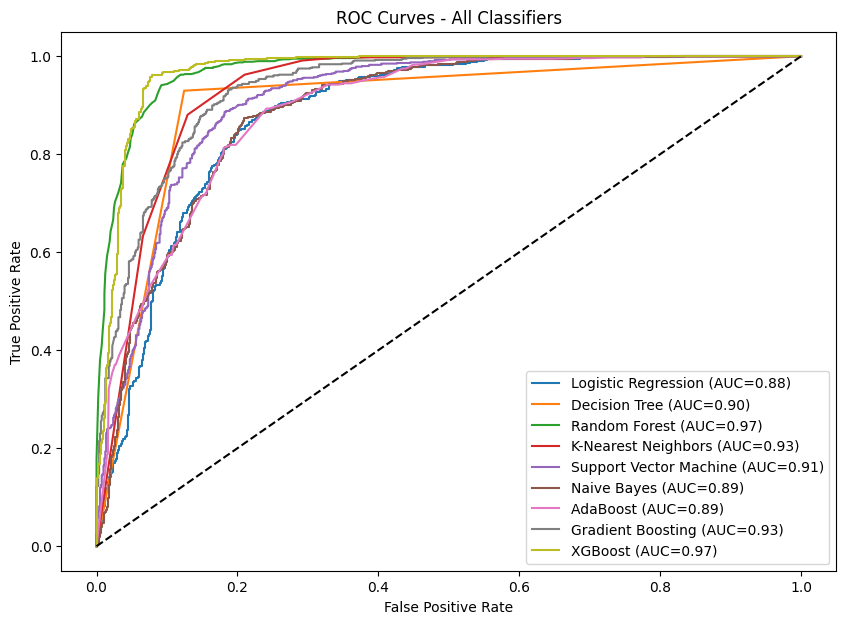

In [77]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss"),
}

metrics, roc_curves = {}, {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    metrics[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curves[name] = (fpr, tpr)

for name, m in metrics.items():
    print(f"\n{name}")
    for k, v in m.items():
        print(f"{k}: {v:.4f}")

best = max(metrics, key=lambda x: metrics[x]["Accuracy"])
print(f"\n✅ Best Model (Accuracy): {best}")

plt.figure(figsize=(10, 7))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={metrics[name]['ROC-AUC']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - All Classifiers")
plt.legend()
plt.show()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best CV ROC-AUC: 0.9691586770367919

Test Performance:
Accuracy : 0.9325
Precision: 0.8991
Recall   : 0.9736
F1 Score : 0.9349
ROC-AUC  : 0.9721


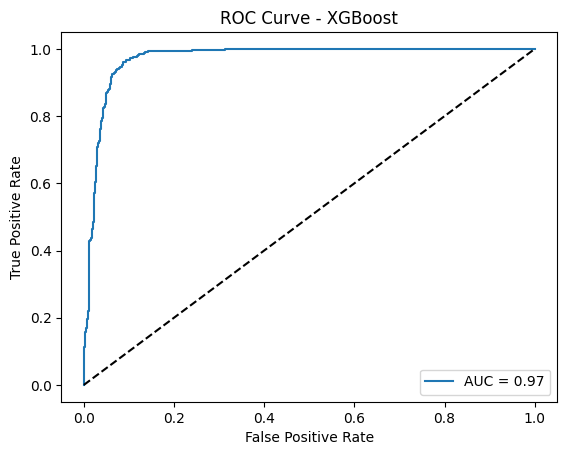

In [78]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss")

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(
    xgb_model, param_grid, cv=5, scoring="roc_auc",
    verbose=1, n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)
print("Best CV ROC-AUC:", grid_search.best_score_)

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nTest Performance:")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_prob):.4f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

In [71]:
import pickle

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)